# PS Processing

In this tutorial, we demostrate how to do PS processing with the decorrelation CLI interface.
The input data for PS processing is prepared in [Load Data](./load_data.ipynb).

In [ ]:
!ls ./load_data

e.zarr	  lat.zarr  meta.toml	  n.zarr    range.zarr	  rslc.zarr  theta.zarr
hgt.zarr  lon.zarr  non_nan.zarr  phi.zarr  rslc_pyramid  scratch


## Amplitude dispersion index calculation

Here were calculate the amplitude dispersion index (ADI) which is used to identify persistent scatterers.

In [ ]:
import zarr
import numpy as np
from matplotlib import pyplot as plt
import colorcet
import moraine.cli as mc
import moraine as mr
from moraine.utils_ import is_cuda_available

In [ ]:
rslc = './load_data/rslc.zarr'
adi = './ps_processing/adi.zarr'

In [ ]:
logger = mc.get_logger()

In [ ]:
if is_cuda_available():
    mc.amp_disp(rslc,adi)

2024-05-20 16:12:50 - log_args - INFO - running function: amp_disp
2024-05-20 16:12:50 - log_args - INFO - fetching args:
2024-05-20 16:12:50 - log_args - INFO - rslc = './load_data/rslc.zarr'
2024-05-20 16:12:50 - log_args - INFO - adi = './ps_processing/adi.zarr'
2024-05-20 16:12:50 - log_args - INFO - chunks = None
2024-05-20 16:12:50 - log_args - INFO - fetching args done.
2024-05-20 16:12:50 - zarr_info - INFO - ./load_data/rslc.zarr zarray shape: (2500, 1834, 17)
2024-05-20 16:12:50 - zarr_info - INFO - ./load_data/rslc.zarr zarray chunks: (1000, 1834, 1)
2024-05-20 16:12:50 - zarr_info - INFO - ./load_data/rslc.zarr zarray dtype: complex64
2024-05-20 16:12:50 - amp_disp - INFO - starting dask CUDA local cluster.
2024-05-20 16:12:52 - amp_disp - INFO - dask local CUDA cluster started.
2024-05-20 16:12:52 - dask_cluster_info - INFO - dask cluster: LocalCUDACluster(dashboard_link='http://127.0.0.1:8787/status', workers=8, threads=8, memory=500.00 GiB)
2024-05-20 16:12:52 - darr_inf

Then visualize the amplitude dispersion index.
Since the data is small, we can visualize it with the API plot module `moraine.plot`.
If you want to reduce the memory consumption, the CLI plot module `moraine.cli.plot`
can be used. But the pyramid should be generated ahead.

In [ ]:
adi_data = zarr.open(adi,'r')[:]
adi_plot = mr.plot.ras_plot(adi_data)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
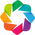

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.models import WheelZoomTool
from holoviews import opts

In [ ]:
adi_plot = adi_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('adi',range=(0,1)))

In [ ]:
adi_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (adi)

Then we can select PS candidates by setting a threshold to the amplitude dispersion index:

In [ ]:
ps_can_gix_ = './ps_processing/ps_can_gix_.zarr'
ps_can_gix = './ps_processing/ps_can_gix.zarr'
mc.pc_logic_ras(adi, ps_can_gix_, 'ras<0.3', chunks=20000)
mc.pc_intersect(ps_can_gix_, './load_data/non_nan.zarr/', ps_can_gix, chunks=20000)

2024-05-20 16:12:58 - log_args - INFO - running function: pc_logic_ras
2024-05-20 16:12:58 - log_args - INFO - fetching args:
2024-05-20 16:12:58 - log_args - INFO - ras = './ps_processing/adi.zarr'
2024-05-20 16:12:58 - log_args - INFO - gix = './ps_processing/ps_can_gix_.zarr'
2024-05-20 16:12:58 - log_args - INFO - operation = 'ras<0.3'
2024-05-20 16:12:58 - log_args - INFO - chunks = 20000
2024-05-20 16:12:58 - log_args - INFO - fetching args done.
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/adi.zarr zarray shape: (2500, 1834)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/adi.zarr zarray chunks: (1000, 1834)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/adi.zarr zarray dtype: float32
2024-05-20 16:12:58 - pc_logic_ras - INFO - loading ras into memory.
2024-05-20 16:12:58 - pc_logic_ras - INFO - select pc based on operation: ras<0.3
2024-05-20 16:12:58 - pc_logic_ras - INFO - number of selected pixels: 44018.
2024-05-20 16:12:58 - zarr_info - INFO 

Then we convert the ps candiates to hillbert coordinates:

In [ ]:
mc.pc_hix('./ps_processing/ps_can_gix.zarr/', './ps_processing/ps_can_hix_unsorted.zarr', shape=(2500, 1834))
ps_can_hix = './ps_processing/ps_can_hix.zarr'
mc.pc_sort('./ps_processing/ps_can_hix_unsorted.zarr', ps_can_hix)

2024-05-20 16:12:58 - log_args - INFO - running function: pc_hix
2024-05-20 16:12:58 - log_args - INFO - fetching args:
2024-05-20 16:12:58 - log_args - INFO - gix = './ps_processing/ps_can_gix.zarr/'
2024-05-20 16:12:58 - log_args - INFO - hix = './ps_processing/ps_can_hix_unsorted.zarr'
2024-05-20 16:12:58 - log_args - INFO - shape = (2500, 1834)
2024-05-20 16:12:58 - log_args - INFO - fetching args done.
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_gix.zarr/ zarray shape: (2, 43201)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_gix.zarr/ zarray chunks: (2, 20000)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_gix.zarr/ zarray dtype: int32
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_hix_unsorted.zarr zarray shape: (43201,)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_hix_unsorted.zarr zarray chunks: (20000,)
2024-05-20 16:12:58 - zarr_info - INFO - ./ps_processing/ps_can_hix_unsorted.zarr zar

In [ ]:
ps_can_rslc = './ps_processing/ps_can_rslc.zarr'
mc.ras2pc(ps_can_hix,
          [rslc,'./load_data/e.zarr','./load_data/n.zarr',
           './load_data/lon.zarr','./load_data/lat.zarr',
           './ps_processing/adi.zarr'],
          [ps_can_rslc, './ps_processing/ps_can_e.zarr','./ps_processing/ps_can_n.zarr',
           './ps_processing/ps_can_lon.zarr', './ps_processing/ps_can_lat.zarr',
           './ps_processing/ps_can_adi.zarr',],
           shape = (2500, 1834),
)

2024-05-20 16:13:00 - log_args - INFO - running function: ras2pc
2024-05-20 16:13:00 - log_args - INFO - fetching args:
2024-05-20 16:13:00 - log_args - INFO - idx = './ps_processing/ps_can_hix.zarr'
2024-05-20 16:13:00 - log_args - INFO - ras = ['./load_data/rslc.zarr', './load_data/e.zarr', './load_data/n.zarr', './load_data/lon.zarr', './load_data/lat.zarr', './ps_processing/adi.zarr']
2024-05-20 16:13:00 - log_args - INFO - pc = ['./ps_processing/ps_can_rslc.zarr', './ps_processing/ps_can_e.zarr', './ps_processing/ps_can_n.zarr', './ps_processing/ps_can_lon.zarr', './ps_processing/ps_can_lat.zarr', './ps_processing/ps_can_adi.zarr']
2024-05-20 16:13:00 - log_args - INFO - shape = (2500, 1834)
2024-05-20 16:13:00 - log_args - INFO - chunks = None
2024-05-20 16:13:00 - log_args - INFO - fetching args done.
2024-05-20 16:13:00 - zarr_info - INFO - ./ps_processing/ps_can_hix.zarr zarray shape: (43201,)
2024-05-20 16:13:00 - zarr_info - INFO - ./ps_processing/ps_can_hix.zarr zarray chun

The point cloud data is sorted according to the hillbert index so they close points in the list are closed to each other in map.

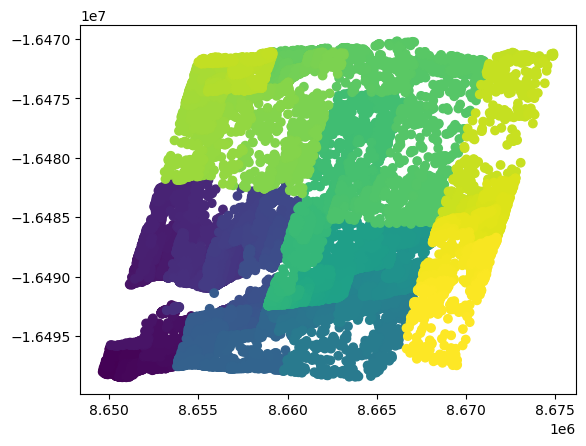

In [ ]:
#| hide
e = zarr.open('./ps_processing/ps_can_e.zarr','r')[:]
n = zarr.open('./ps_processing/ps_can_n.zarr','r')[:]
plt.scatter(n,e,c=np.arange(e.shape[0]))
plt.show()

## visualize the PS

In [ ]:
mc.pc_pyramid(
    './ps_processing/ps_can_rslc.zarr', 
    './ps_processing/ps_can_e.zarr', './ps_processing/ps_can_n.zarr/',
    './ps_processing/ps_can_rslc_pyramid',
    ras_resolution = 20)

2024-05-20 16:13:03 - log_args - INFO - running function: pc_pyramid
2024-05-20 16:13:03 - log_args - INFO - fetching args:
2024-05-20 16:13:03 - log_args - INFO - pc = './ps_processing/ps_can_rslc.zarr'
2024-05-20 16:13:03 - log_args - INFO - x = './ps_processing/ps_can_e.zarr'
2024-05-20 16:13:03 - log_args - INFO - y = './ps_processing/ps_can_n.zarr/'
2024-05-20 16:13:03 - log_args - INFO - out_dir = './ps_processing/ps_can_rslc_pyramid'
2024-05-20 16:13:03 - log_args - INFO - ras_resolution = 20
2024-05-20 16:13:03 - log_args - INFO - fetching args done.
2024-05-20 16:13:03 - zarr_info - INFO - ./ps_processing/ps_can_rslc.zarr zarray shape: (43201, 17)
2024-05-20 16:13:03 - zarr_info - INFO - ./ps_processing/ps_can_rslc.zarr zarray chunks: (20000, 1)
2024-05-20 16:13:03 - zarr_info - INFO - ./ps_processing/ps_can_rslc.zarr zarray dtype: complex64
2024-05-20 16:13:03 - pc_pyramid - INFO - rendering point cloud data coordinates:
2024-05-20 16:13:04 - pc_pyramid - INFO - pc data coord

In [ ]:
def intf_0_pc(data_zarr,idx_array,i):
    return np.angle(data_zarr[idx_array,i]*data_zarr[idx_array,0].conj())
def intf_0_ras(data_zarr, xslice, yslice,i):
    return np.angle(data_zarr[yslice,xslice,i]*data_zarr[yslice,xslice,0].conj())

In [ ]:
intf_plot = mc.pc_stack_plot('./ps_processing/ps_can_rslc_pyramid/',post_proc_ras=intf_0_ras, post_proc_pc=intf_0_pc,level_increase=1)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
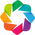

In [ ]:
import holoviews as hv
from bokeh.models import WheelZoomTool
hv.extension('bokeh')
dates = ["20210802", "20210816", "20210830", "20210913", "20211011", "20211025", "20220606", "20220620",
         "20220704", "20220718", "20220801", "20220815", "20220829", "20220912", "20220926", "20221010",
         "20221024",]
intf_plot = intf_plot.redim(i=hv.Dimension('i', label='Interferogram', range=(0,16), value_format=(lambda i: dates[i]+'_'+dates[0])),
                            x=hv.Dimension('lon', label='Longitude'), y=hv.Dimension('lat',label='Latitude'), z=hv.Dimension('Phase',range=(-np.pi,np.pi)))

In [ ]:
hv.output(widget_location='bottom')
intf_plot.opts(
    hv.opts.Image(
        cmap='colorwheel',width=600, height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',width=600, height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
)

:DynamicMap   [i]
   :Overlay
      .Image.I  :Image   [lon,lat]   (Phase,idx)
      .Points.I :Points   [lon,lat]   (Phase,idx)